In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

In [3]:
seed = 634563541

In [4]:
data = pd.read_csv('data_SHAP.csv')
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [5]:
sp = RepeatedStratifiedKFold(random_state=seed,n_repeats=3,n_splits=5)

In [59]:
import hyperopt
from hyperopt import hp

In [38]:
def objective(params):
    aucs = []
    for train_index,test_index in sp.split(X,y):
        X_train = X.iloc[train_index,:]
        X_vali = X.iloc[test_index,:]
        y_train = y[train_index]
        y_vali = y[test_index]
        model = RandomForestClassifier(random_state=seed,
                                       n_estimators=params['n_estimators'],
                                       max_depth=params['max_depth'],
                                       min_samples_split=params['min_samples_split'],
                                       min_samples_leaf=params['min_samples_leaf'])
        model.fit(X_train,y_train)
        pro_vali = model.predict_proba(X_vali)[:,1]
        auc_vali = roc_auc_score(y_vali,pro_vali)
        aucs.append(auc_vali)
    return -np.mean(aucs)

In [39]:
space = {
    'n_estimators':hp.choice('n_estimators',range(2,50)),
    'max_depth':hp.choice('max_depth',range(1,5)),
    'min_samples_split':hp.choice('min_samples_split',range(2,50)),
    'min_samples_leaf':hp.choice('min_samples_leaf',range(2,50)),
}

In [40]:
best_param = hyperopt.fmin(objective,space,hyperopt.tpe.suggest,max_evals=50)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:35<00:00,  1.40trial/s, best loss: -0.998]             


In [41]:
best_param

{'max_depth': np.int64(1),
 'min_samples_leaf': np.int64(0),
 'min_samples_split': np.int64(24),
 'n_estimators': np.int64(39)}

In [6]:
model = RandomForestClassifier(random_state=seed,
                               n_estimators=range(2,50)[39],
                               max_depth=range(1,5)[1],
                               min_samples_split=range(2,50)[24],
                               min_samples_leaf=range(2,50)[0])
model.fit(X,y)

RandomForestClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=26,
                       n_estimators=41, random_state=634563541)

In [7]:
def func(X):
    return model.predict_proba(X)[:,1]

In [8]:
explainer = shap.KernelExplainer(func,X)
shap_values = explainer.shap_values(X)

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

<Figure size 1920x1440 with 0 Axes>

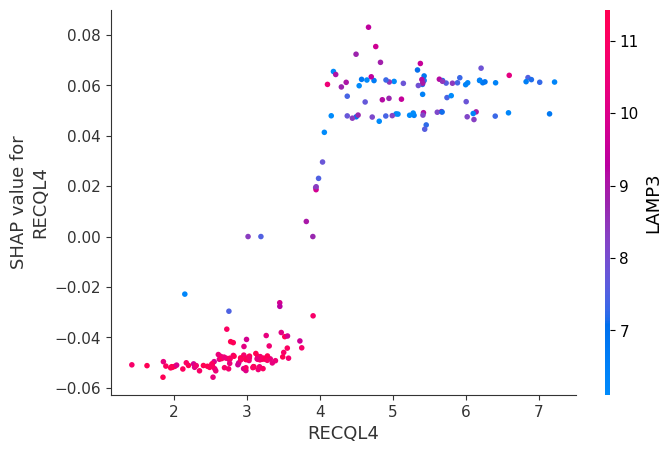

In [78]:
plt.figure(dpi=300)
shap.dependence_plot('RECQL4',shap_values,X,show=False)
plt.savefig('RF_RECQL4.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

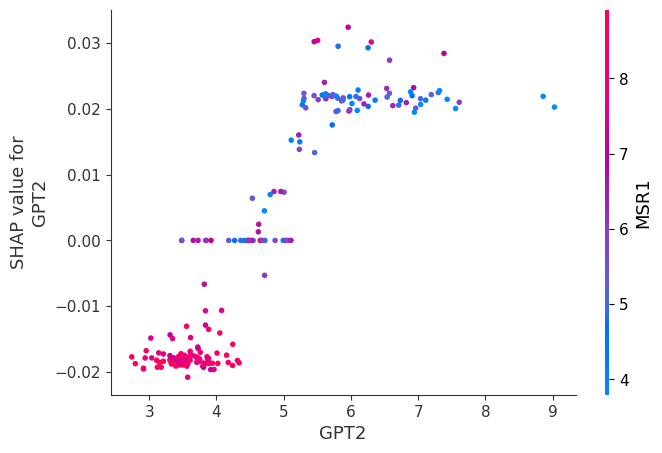

In [65]:
plt.figure(dpi=300)
shap.dependence_plot('GPT2',shap_values,X,show=False)
plt.savefig('RF_GPT2.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

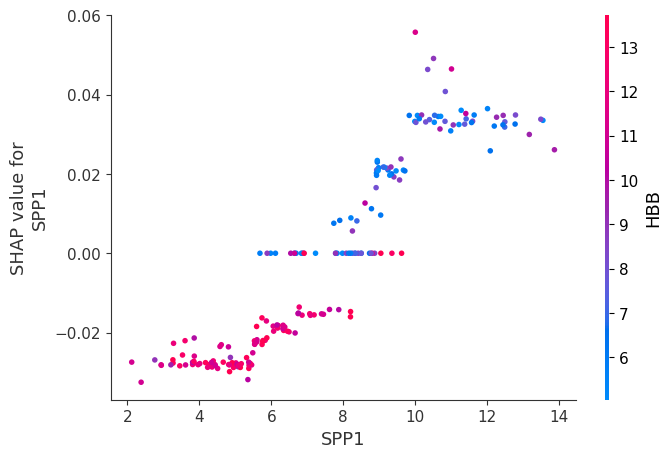

In [9]:
plt.figure(dpi=300)
shap.dependence_plot('SPP1',shap_values,X,show=False,interaction_index='HBB')
plt.savefig('RF_SPP1.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

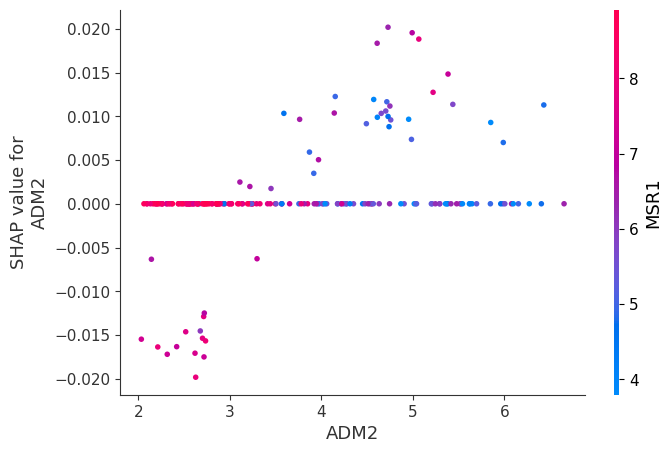

In [67]:
plt.figure(dpi=300)
shap.dependence_plot('ADM2',shap_values,X,show=False)
plt.savefig('RF_ADM2.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

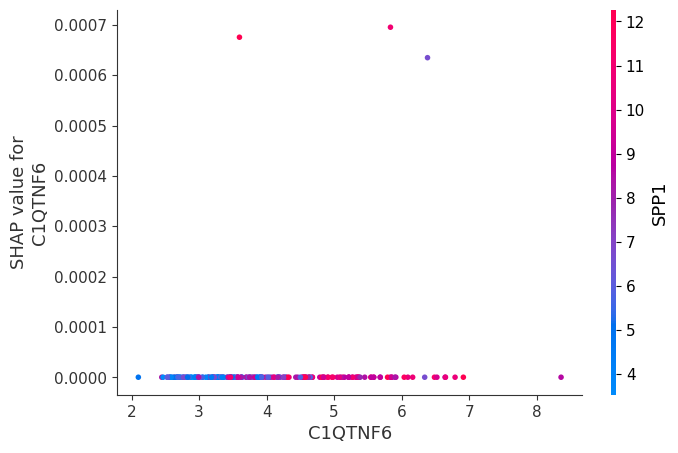

In [68]:
plt.figure(dpi=300)
shap.dependence_plot('C1QTNF6',shap_values,X,show=False)
plt.savefig('RF_C1QTNF6.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

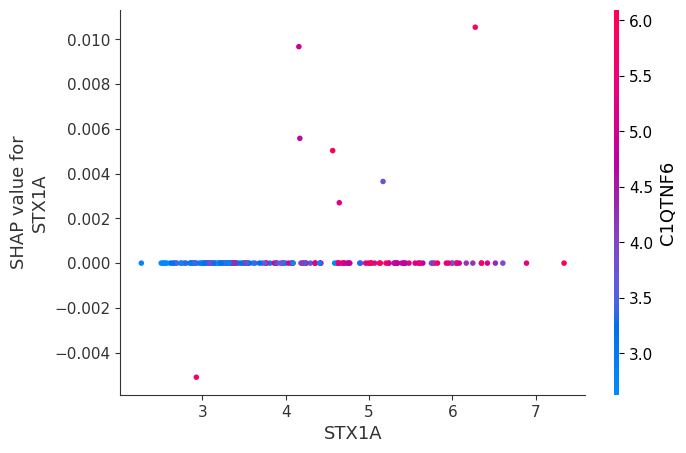

In [69]:
plt.figure(dpi=300)
shap.dependence_plot('STX1A',shap_values,X,show=False)
plt.savefig('RF_STX1A.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

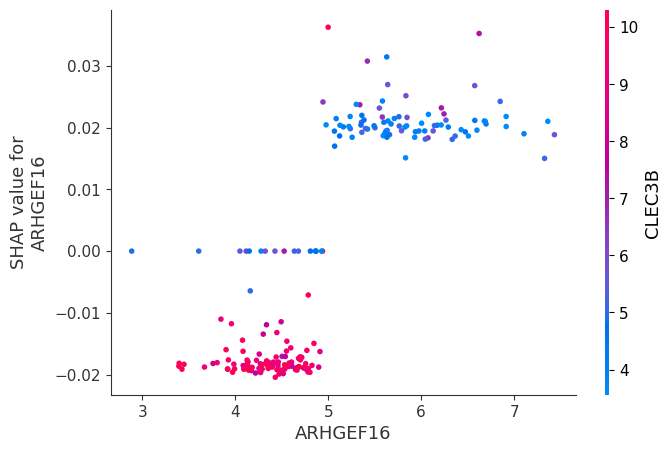

In [70]:
plt.figure(dpi=300)
shap.dependence_plot('ARHGEF16',shap_values,X,show=False)
plt.savefig('RF_ARHGEF16.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

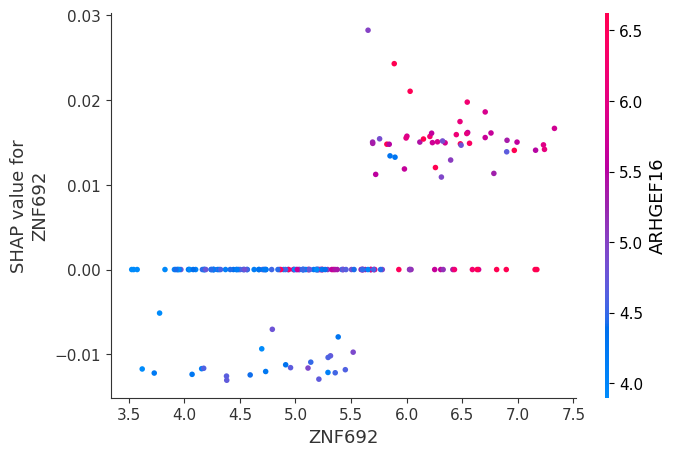

In [71]:
plt.figure(dpi=300)
shap.dependence_plot('ZNF692',shap_values,X,show=False)
plt.savefig('RF_ZNF692.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

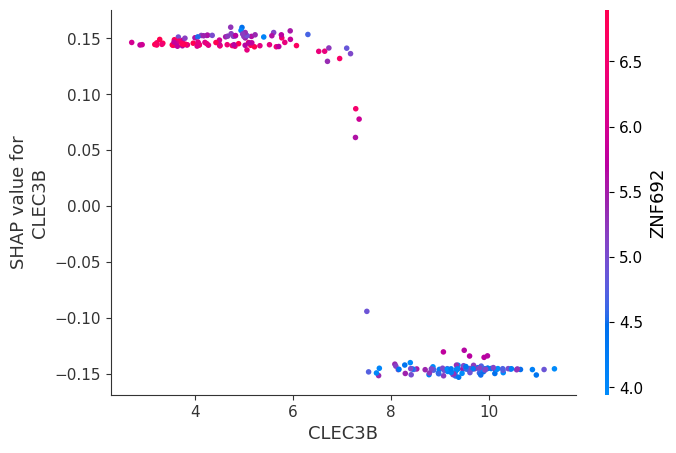

In [72]:
plt.figure(dpi=300)
shap.dependence_plot('CLEC3B',shap_values,X,show=False)
plt.savefig('RF_CLEC3B.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

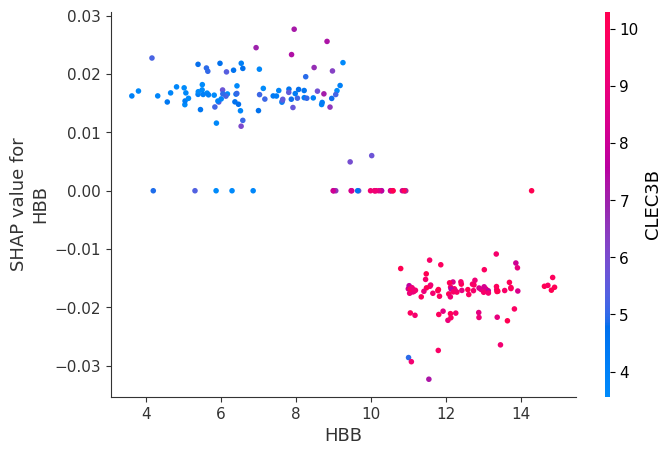

In [73]:
plt.figure(dpi=300)
shap.dependence_plot('HBB',shap_values,X,show=False)
plt.savefig('RF_HBB.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

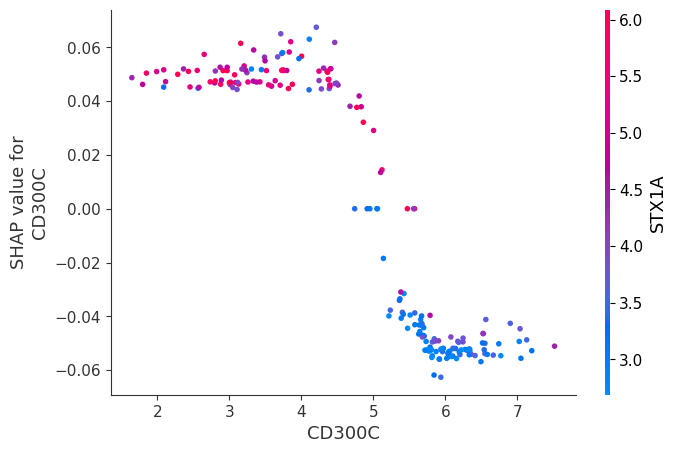

In [74]:
plt.figure(dpi=300)
shap.dependence_plot('CD300C',shap_values,X,show=False)
plt.savefig('RF_CD300C.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

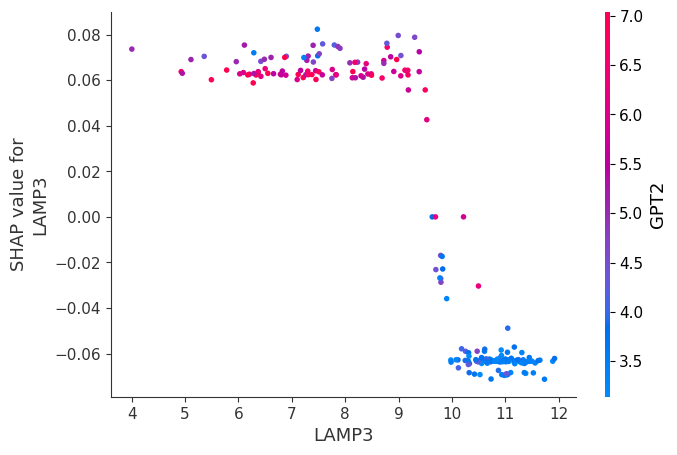

In [75]:
plt.figure(dpi=300)
shap.dependence_plot('LAMP3',shap_values,X,show=False)
plt.savefig('RF_LAMP3.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

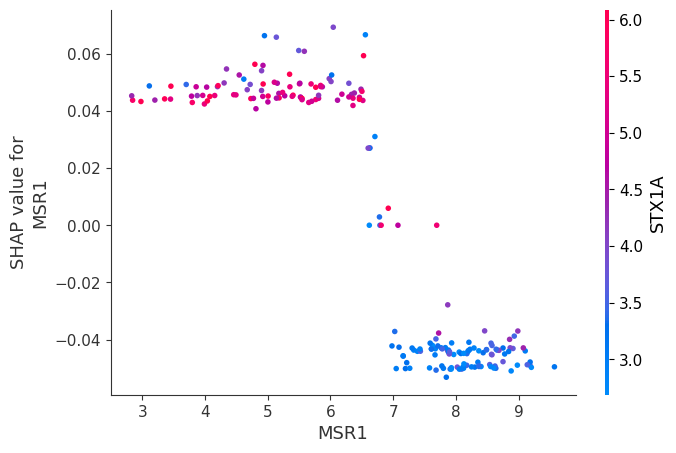

In [76]:
plt.figure(dpi=300)
shap.dependence_plot('MSR1',shap_values,X,show=False)
plt.savefig('RF_MSR1.png',dpi=600,bbox_inches='tight')

<Figure size 1920x1440 with 0 Axes>

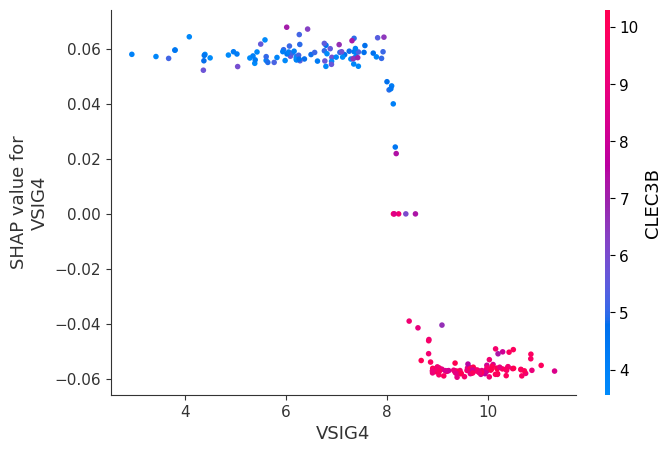

In [77]:
plt.figure(dpi=300)
shap.dependence_plot('VSIG4',shap_values,X,show=False)
plt.savefig('RF_VSIG4.png',dpi=600,bbox_inches='tight')

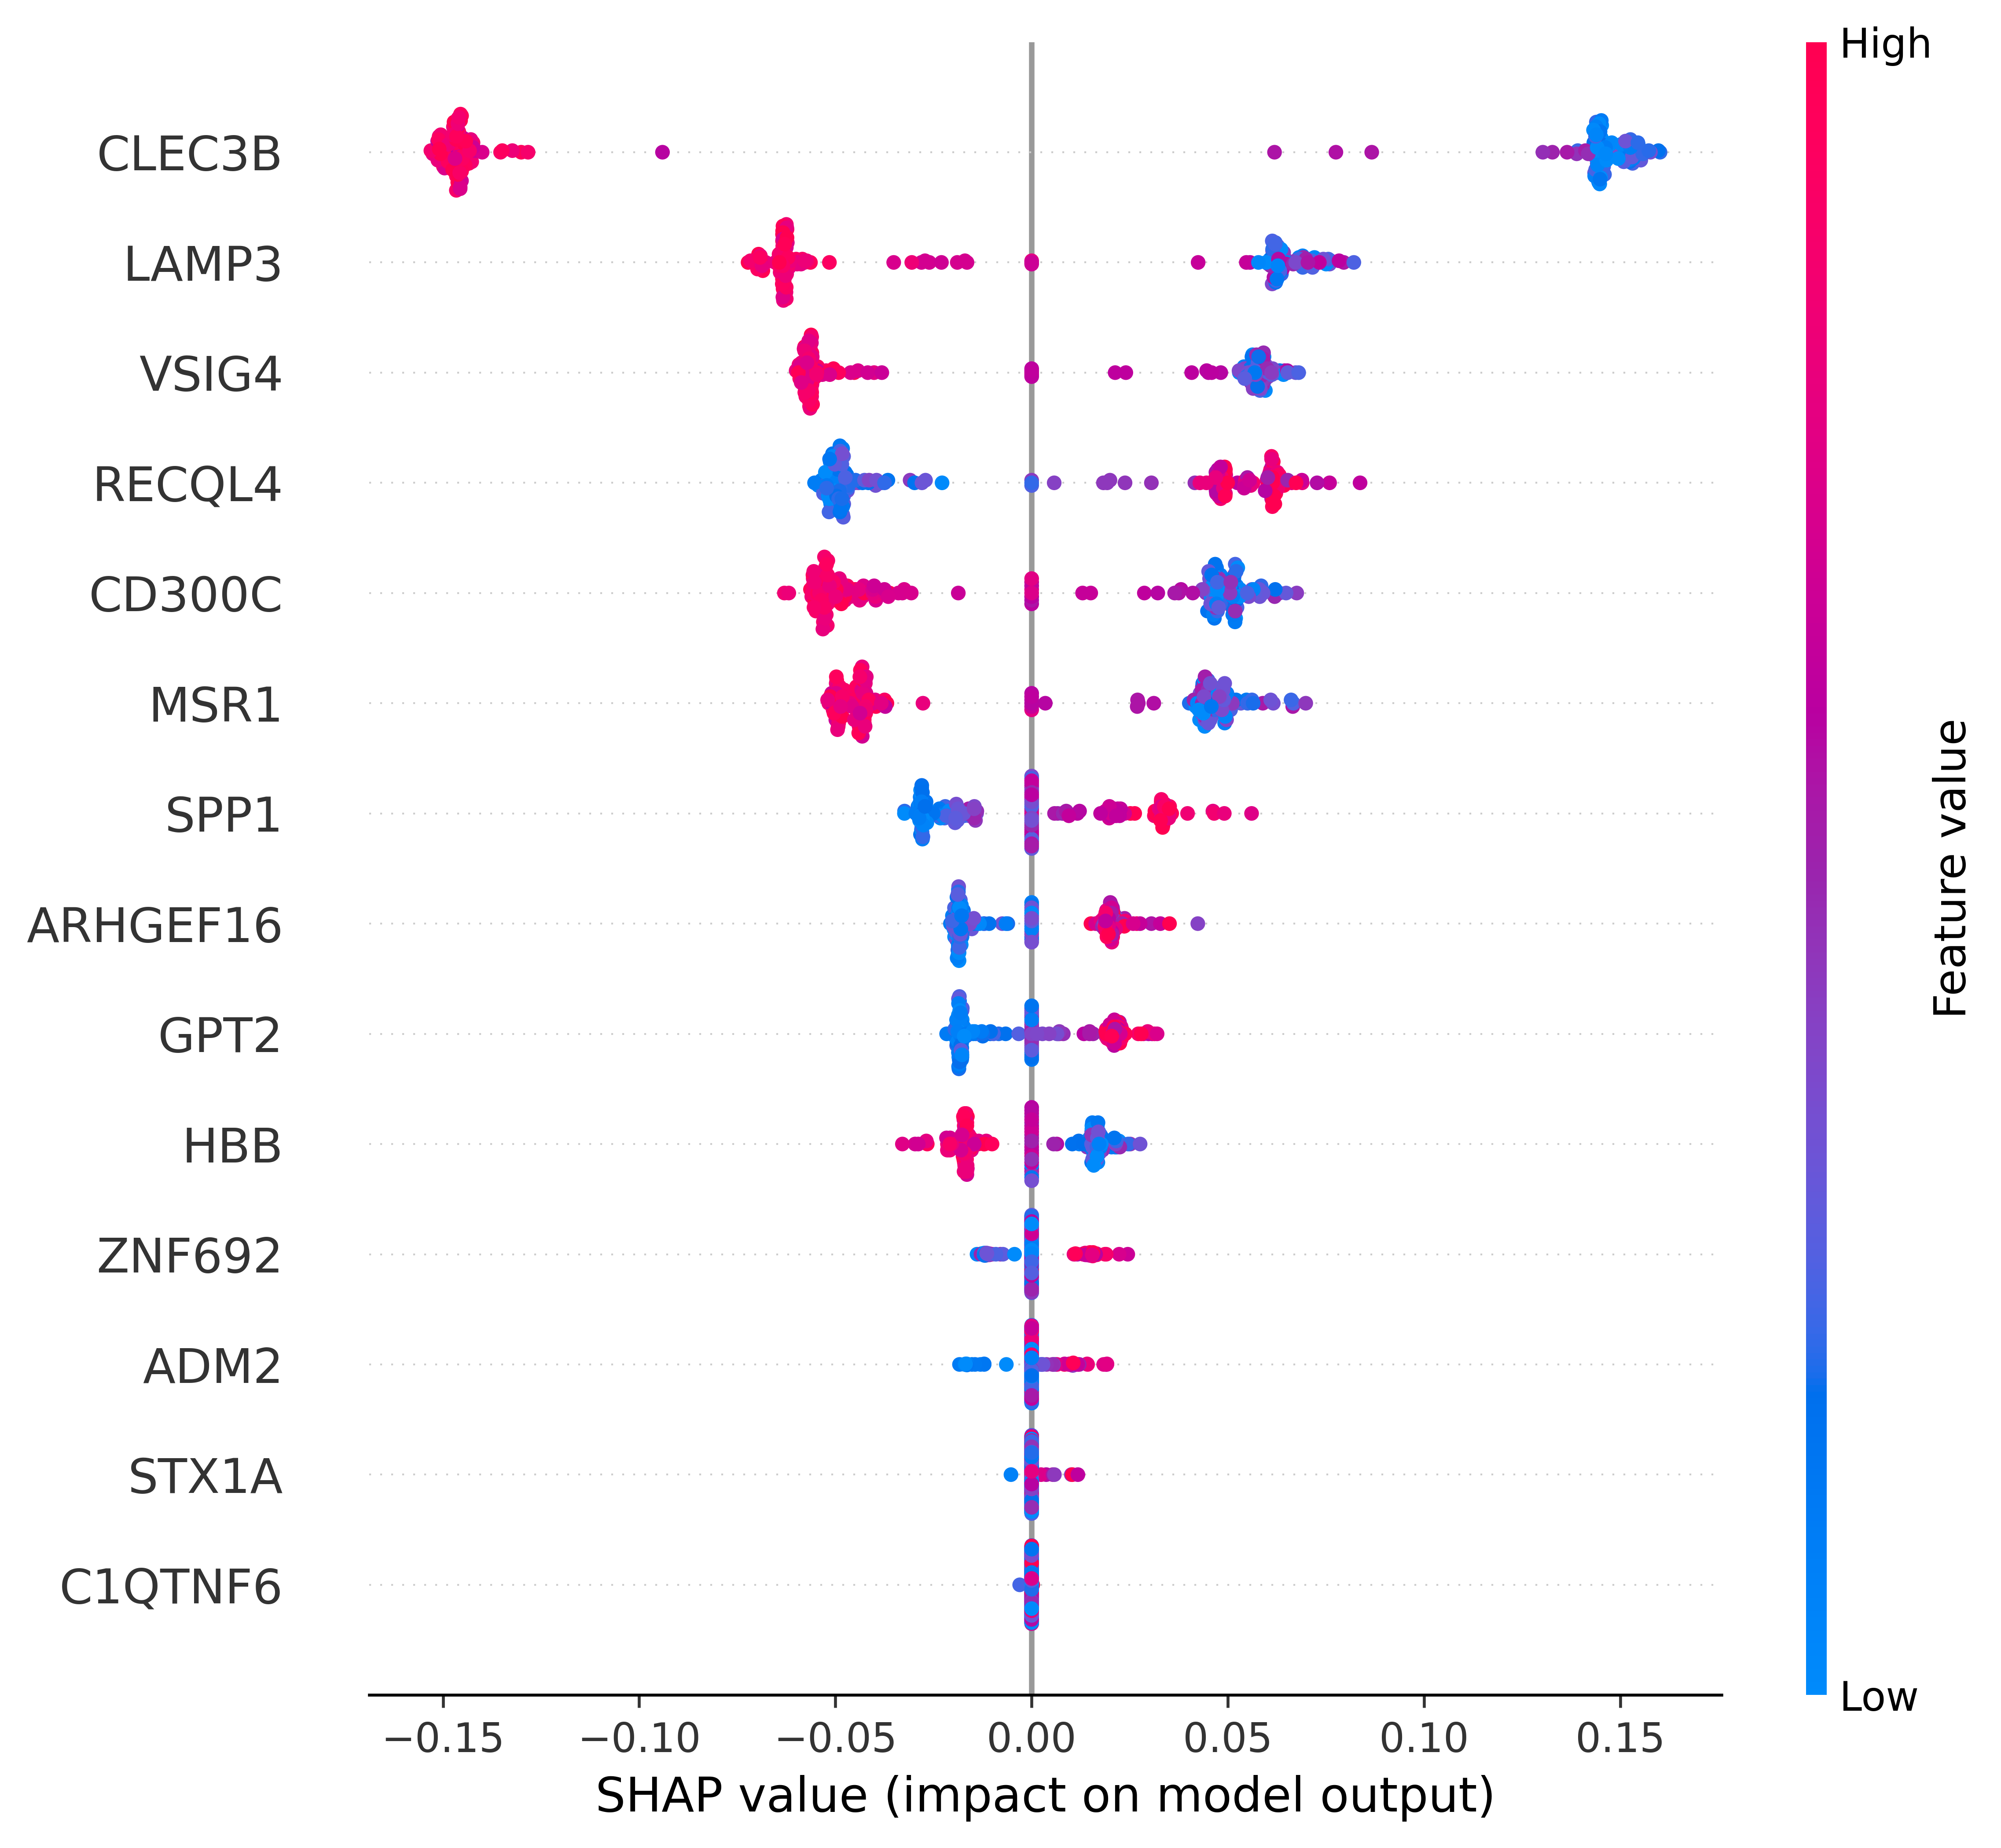

In [8]:
plt.figure(dpi=600)
shap.summary_plot(shap_values,X,show=False)
plt.savefig('RF_importance.png')
plt.show()